#1- Importing Required Libraries

In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import  warnings 
warnings.filterwarnings("ignore")

# 2-Importing data and taking a firt glance 


In [62]:
df=pd.read_csv("kc_house_data.csv") # ... reading data 

In [63]:
df.head(5) # ... showing the first five rows from the data 


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [64]:
print("shape of the data frame : {}".format(df.shape))# ... number of rows and  columns 
print("name of columns :  {}".format(df.columns)) # ... column names 

shape of the data frame : (21613, 21)
name of columns :  Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [65]:
df.info() # ..... counting the number of non missing values in each column , col names and datatypes  
# result. ..we can see that we dont have missing values and we need to change datatypes for certain columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Describtion of the data 

1-   id - Unique ID for each home sold
2-date - Date of the home sale
3-price - Price of each home sold
4-bedrooms - Number of bedrooms
5-bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6-sqft_living - Square footage of the apartments interior living space
7-sqft_lot - Square footage of the land space
8-floors - Number of floors
9-waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 1’s represent a waterfront property, 0’s represent a non-waterfront property
10-view - An index from 0 to 4 of how good the view of the property was, 0 - lowest, 4 - highest
11-condition - An index from 1 to 5 on the condition of the apartment, 1 - lowest, 4 - highest
12-grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
13-sqft_above - The square footage of the interior housing space that is above ground level
14-sqft_basement - The square footage of the interior housing space that is below ground level
15-yr_built - The year the house was initially built
16-yr_renovated - The year of the house’s last renovation
17-zipcode - What zipcode area the house is in
18-lat - Lattitude
19-long - Longitude
20-sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21-sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


#2- Cleaning and Validate the dataset 

1-data types 

In [66]:
df["date"]= pd.to_datetime(df["date"]) # ... cahnging the date column from object to datetime 
df[["condition","grade","view","waterfront"]]=df[["condition","grade","view","waterfront"]].astype("category")#... they have a finite set of element
df["zipcode"]=df["zipcode"].astype("object")

In [67]:
df.dtypes # .... check that apply the change 

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

2- Checking missing values 

In [68]:
df.isnull().sum()#.... to check missing values in each column 
# there is no missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

3-duplicated values 

In [69]:
dup =df.duplicated(subset= ["id"] ,keep=False)#...creating false /true series to see duplicated values 
dup_df=df[dup] #.. converting the series to df 
dup_df#. ..There are duplicated values to be investigated


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


In [70]:
# There are some houses that are sold twice in different date or price 
print( "# of houses that are sold twice are {} ".format(dup_df.id.unique().shape))
dup_df[["id","price", "date"]]#...columns changes 
dup_df_price_id=dup_df[dup_df.duplicated(subset=["id","price"],keep=False)].sort_values("price")
#... checking the houses that are sold twice with no price change
dup_df_price_id
#...checking if we need to delete them 
df=df.drop_duplicates(subset=["id","price"]) #..deleting the duplicated values (3 rows)
#df

# of houses that are sold twice are (176,) 


4- validate the date 

In [71]:
# By understanding the data, the sqft_above + sqft_basement = sqft_living 
# schecking if that applies on all values 
sum = df[["sqft_above" , "sqft_basement"]].sum(axis=1)#...calculating the sum from the two columns
mask=sum==df["sqft_living"]#...creating a series that has True if the condition is true 
df[~mask]#..... Filtering our data Frame to see the False result ( did not meet the condition) by using ~ 
#There is no row that doesnt meet the condition so we can trust our data more  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


5- checking inconsistency in categorical/discrete columns by using .value_counts() and bar plot

  a-bedrooms

<Axes: xlabel='bedrooms'>

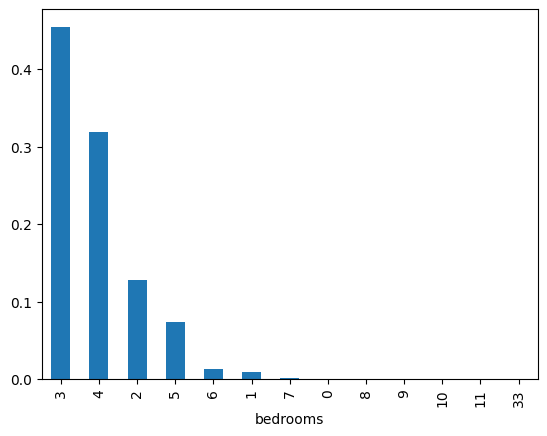

In [72]:
df["bedrooms"].value_counts(sorted).plot(kind="bar")#... we can see that 33 is so far from other dataset 
# but first lets try to understand if this is possible or not depending on the other factor 

In [73]:
df_bedroom_33=df[df["bedrooms"]==33]
df_bedroom_33
# we can see that this column doesnt make any sense so we will delete it 
df=df.drop(df_bedroom_33.index)#.. drop the index
df.bedrooms.value_counts()#..to check if the column has been deleted

bedrooms
3     9822
4     6881
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [74]:
df_bedroom_0=df[df["bedrooms"]==0]
df_bedroom_0# ... we cant have houses with 0 bedrooms

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


Text(0.5, 1.0, '#of bed rooms')

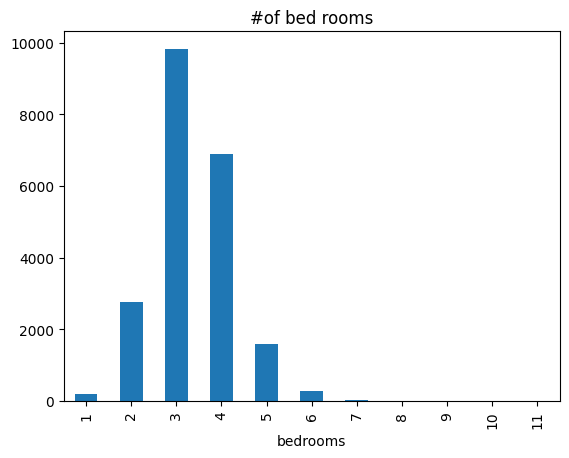

In [75]:
(len(df_bedroom_0)/len(df))*100 # ...we see only we have 0.06% so we can delete them 
df=df.drop(df_bedroom_0.index)
df["bedrooms"].value_counts().sort_index().plot(kind="bar")
plt.title("#of bed rooms")

b-waterfront and view

In [76]:
df["waterfront"].value_counts(normalize=True) 
# only 0 and 1 ... bun we can conclude that nearly 99% from our houses don't have waterfront 

waterfront
0    0.992452
1    0.007548
Name: proportion, dtype: float64

In [77]:
df["view"].value_counts(normalize=True) 
# like discribtion .. only wwe have from one to four rank but we can see that nearly 90% has very poor view 

view
0    0.901787
2    0.044499
3    0.023569
1    0.015373
4    0.014771
Name: proportion, dtype: float64

3-condition and grade 

<Axes: xlabel='grade'>

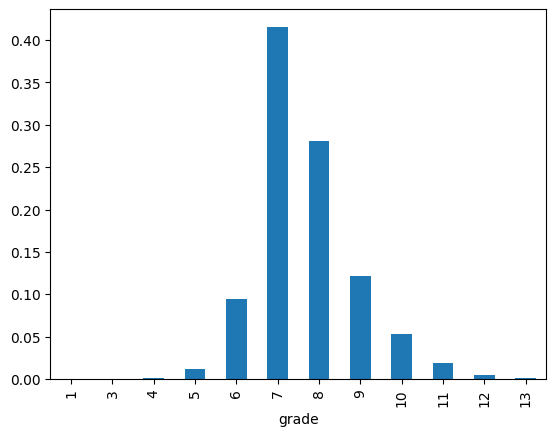

In [78]:
df["grade"].value_counts(normalize=True).sort_index().plot(kind="bar")
#we can see that grade is on the rangefor (1-13) .Also , we can see that most building has  an average level of construction and design

<Axes: xlabel='condition'>

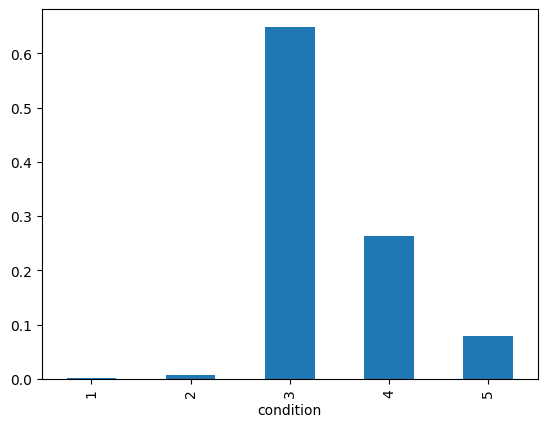

In [79]:
df["condition"].value_counts(normalize=True).sort_index().plot(kind="bar")
# we can see that grade is on the rangefor (1-5) .Also , nearly more than 90%  houses have  a good/grat condition 

In [80]:
df_bad_condtion=df[df["condition"].isin([1,2])]#...maybe we use it in our anlaysis later 

#3-Primary Data Analysis /feature extraction 


In [81]:
# this graph show that they are related to each other 
#converting zip code to city name by using : 
!pip install uszipcode


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
#converting zip code to city name 
from uszipcode import SearchEngine, SimpleZipcode
search = SearchEngine()
def zco(x):
    city = search.by_zipcode(x).major_city
    return city if city else 'None'

df['city'] = df['zipcode'].apply(zco)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,Seattle
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,Seattle
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,Seattle
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,Issaquah


In [83]:
#(is renovated) column is more useful than (yr_renovated) 
df["is_renovated"] =0 
df.loc[df['yr_renovated'].astype("int") > 0, 'is_renovated'] = 1


In [84]:
df["year"]=df["date"].dt.year #..changing the data type of year column to simplify the analysis
df["month"]=df["date"].dt.month#..changing the data type of month column to simplify the analysis
#df.loc[df["yr_renovated"]>0 , "yr_built"]=df["yr_renovated"]#. .change year built to year renovated 
#df["year_until_purchase"]=df["year"]-df["yr_built"]#. ... create our target variable which indicates how long the house from building  until its purschase 
#d=df.to_csv("C:\\Users\\LENOVO\\Desktop\\New folder")

## Handling Outliers

In [85]:
def identify_outliers(col_name, df):
# Identify outliers using the interquartile range method.
    Q1 = np.quantile(df[col_name], 0.25)
    Q3 = np.quantile(df[col_name], 0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return (df[col_name] > upper_limit) | (df[col_name] < lower_limit)

outlier_mask = identify_outliers("bedrooms", df)

In [86]:
from sklearn.preprocessing import RobustScaler

def handle_outliers(data):
    # Copy the input DataFrame to avoid modifying the original data
    processed_data = data.copy()
    
    # Separate columns by data type
    numeric_cols = processed_data.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = processed_data.select_dtypes(include=['object', 'category']).columns.tolist()
    datetime_cols = processed_data.select_dtypes(include=['datetime64']).columns.tolist()
    
    # Initialize RobustScaler for numeric columns
    scaler = RobustScaler(quantile_range=(25, 75))
    
    # Scale numeric columns
    processed_data[numeric_cols] = scaler.fit_transform(processed_data[numeric_cols])    
    return processed_data

df = handle_outliers(df)

#feature selection

In [87]:
# based on understanding our data and feature engineering, dropping non-sense columns
df[["yr_built","is_renovated" ,"year" ,"month"]]=df[["yr_built","is_renovated" ,"year" ,"month"]].astype("category")
#yr_untill_purchase= yr_purshase(2014/2015) - yr_build 1980
df_before_dummies=df


In [88]:
#one hot encoder for backward elimination and modeling 
df_city=pd.get_dummies(df["city"],drop_first=True)
df_dummies=pd.concat([df,df_city] ,axis=1)
df_dummies = df_dummies.drop(columns=["city"])
df_lat=df_dummies
df_dummies=df_dummies.drop(["id","zipcode","lat","long","yr_renovated","date"],axis=1) 


#BACK WORD ELIMINATION 1

In [89]:
# x ,y 
x=df_dummies.drop("price" ,axis=1)
y=df_dummies["price"]
x=x.values # converted to 2d array
y=y.values # converted to 1d array 
y.shape
x.shape

(21596, 40)

In [90]:
x=np.append(arr=np.ones((21596,1)).astype("int"),values=x,axis=1) # adding one to the first column of the array 
# b0 in  statsmodels is not defined 
x.shape

(21596, 41)

In [91]:
df_after_extract_features=df_dummies.drop("price" ,axis=1) # dropping the column of target to only take features 
df_after_extract_features=df_after_extract_features.iloc[: , [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,28,29,30,31,32,33,34,35,36,37,39]] #subsetting the index we got from the backword elimination 
df_after_extract_features.columns # print columns name 

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'is_renovated', 'year', 'month', 'Bellevue', 'Black Diamond', 'Bothell',
       'Carnation', 'Duvall', 'Fall City', 'Federal Way', 'Issaquah',
       'Kenmore', 'Kirkland', 'Maple Valley', 'Medina', 'Mercer Island',
       'North Bend', 'Redmond', 'Renton', 'Sammamish', 'Seattle', 'Snoqualmie',
       'Woodinville'],
      dtype='object')

In [92]:
y=df_dummies["price"]# our target Series 
df_new=pd.concat([df_after_extract_features ,y] ,axis=1) # features dataFrame that resulted from the backword elimination 
df_new[["waterfront","view","condition","grade","is_renovated","year","month"]]=df_new[["waterfront","view","condition","grade","is_renovated","year","month"]].astype(int) #converting data type to int 

Bckword_Elimination 2 

In [93]:
# making a second data Frame which containing latitude and longitude, named df_lat 
df_lat=df_lat.drop(["id","date","zipcode","yr_renovated"],axis=1) # creating df_lat 
X=df_lat.drop("price" ,axis=1) # features variable 
y=df_lat["price"] # target variable 
X=X.values # converted to 2d array
y=y.values # converted to 1d array 
y.shape # shape of array for target variable 
X.shape # shape of array for features 

(21596, 42)

In [94]:
X=np.append(arr=np.ones((21596,1)).astype("int"),values=X,axis=1) # adding one to the first column of the array 
# because b0 in  statsmodels doesnt defined 
X.shape

(21596, 43)

In [95]:
df_lat=df_lat.drop("Carnation",axis=1) # df_

#models

In [96]:
from pandas.core import algorithms 
from sklearn.linear_model import LinearRegression ,Lasso
from sklearn.model_selection import train_test_split ,cross_val_score , KFold,GridSearchCV ,RandomizedSearchCV ,learning_curve
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE


class Regresssion_models() : # creating a class for random forest and gradient boosting algorithms, which contains functions that help automating any data to choose the best model
  def __init__(self,data,target,algorithim): 
    """ variables related to the entire class """
    self.data=data
    self.target=target
    self.algorithim=algorithim
  
  
  def model(self) :
    """ splitting data, features from target variables. And splitting data to train and test to get reliable results """
    X=self.data.drop(self.target ,axis=1)
    y=self.data[self.target]
    X_train,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2 ,random_state=0)
    return(X_train ,X_test ,y_train ,y_test)

  def train(self):
    """ trainig the model to get the coefficients"""
    mdl=self.algorithim
    return mdl.fit(self.model()[0],self.model()[2])

  def score(self,number_of_fold=5):
    """ Calculate the Score for cross validation of data, training, and testing the data"""
    kf=KFold(number_of_fold ,shuffle=True,random_state=0)
    cv_score=np.mean(cross_val_score(self.algorithim,self.model()[0],self.model()[2],cv=kf))
    train_score=self.train().score(self.model()[0],self.model()[2])
    test_score=self.train().score(self.model()[1],self.model()[3])
    return (f"validation_score:{cv_score},train_score:{train_score} ,test_score :{test_score}")

  def enhance_rf_model(self,n_estimators=100 ,max_depth=8 , min_sample_leaf=3,number_of_fold=5) : 
    """ Hyperparameter tuning for the random forest model, to get best hyperparameter"""
    grid={"n_estimators":n_estimators, "max_depth":max_depth, "min_samples_leaf" : min_sample_leaf}
    CV=RandomizedSearchCV(self.algorithim,grid,cv=number_of_fold,n_jobs=-1,n_iter=25) 
    CV.fit(self.model()[0],self.model()[2])
    return CV.best_params_

  def enhance_boost_model(self,n_estimators=100,number_of_fold=5) : 
    """ Hyperparameter tuning for the gradient boosting model, to get best trees number (n_estimators) at a certain learning rate which is 0.2"""
    grid={"n_estimators":n_estimators}
    CV=GridSearchCV(self.algorithim,grid,cv=number_of_fold,n_jobs=-1) 
    CV.fit(self.model()[0],self.model()[2])     
    for mean, std, params in zip(CV.cv_results_['mean_test_score'], CV.cv_results_['std_test_score'], CV.cv_results_['params']):
      print("%0.3f for %r"%(mean , params))

  def enhance_boost_model_second(self,learning_rate=0.2,n_estimators=190 ,max_depth=8 , min_sample_leaf=10,number_of_fold=5,subsample=0.8) : 
    """ Hyperparameter tuning for the gradient boosting model, to get best hyperparameter, related to the trees"""
    grid={"max_depth":max_depth ,"min_samples_leaf":min_sample_leaf}
    CV=RandomizedSearchCV(self.algorithim,grid,cv=number_of_fold,n_jobs=-1,n_iter=25) 
    CV.fit(self.model()[0],self.model()[2])     
    for mean, std, params in zip(CV.cv_results_['mean_test_score'], CV.cv_results_['std_test_score'], CV.cv_results_['params']):
      print("%0.3f  for %r"%(mean , params))
  

  def feature_selection(self) :
    """most important features, depending on random forest selestion"""
    importance_feature= pd.Series (self.train().feature_importances_ , index=self.data.drop(self.target ,axis=1).columns).sort_values() 
    importance_feature.plot(kind="bar") 
    plt.show( ) 

  def learn_curve(self,train_size ,number_of_fold=5) :
    """Creating learning curve to validate our data"""
    train_sizes, train_scores, test_scores = learning_curve(estimator=self.algorithim,X=self.data.drop(self.target ,axis=1),y=self.data[self.target],cv=number_of_fold, scoring="neg_root_mean_squared_error",train_sizes=train_size)
    train_mean= -train_scores.mean(axis=1)
    test_mean = -test_scores.mean(axis=1)
    plt.subplots(figsize=(10,8))
    plt.plot(train_sizes, train_mean, label="train")
    plt.plot(train_sizes, test_mean, label="validation")
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.legend(loc="best")

  def price_var(self) : 
    """Finding the residual which between the actual and perdition price to see how its distribution looks links. """
    y_pred = self.train().predict(self.model()[1])
    y_test=self.model()[3]
    residual=y_test-y_pred
    plt.figure(figsize=(10,8))
    return sns.distplot(residual) 

  def rmse(self) : 
    """Calculate the root mean square error"""
    y_pred = self.train().predict(self.model()[1])
    y_test=self.model()[3]
    return (f"root mean square error : {np.sqrt(mean_squared_error(y_test,y_pred))}")

#RandomForest 

for dataframe without latitude and longitude

In [97]:
rf=Regresssion_models(data=df_new,target="price",algorithim=RandomForestRegressor(random_state=0)) #instantiate the class

In [98]:
rf.score() # calculating accuracies (cv, train, test) for first trial without tuning >> overfitting 

'validation_score:0.7972341864236837,train_score:0.9738847189187415 ,test_score :0.840171186657253'

In [99]:
dict_=rf.enhance_rf_model(n_estimators=np.arange(100,250,50),max_depth=np.arange(3,10,1),min_sample_leaf=np.arange(5,20,1))#tuning hyperparameter

In [100]:
rf=Regresssion_models(data=df_new,target="price",algorithim=RandomForestRegressor(**dict_)) #instantiate the class with new hyperparameter

In [101]:
rf.score() #..calculating accuracies (cv, train, test) for trial 2 >> reduced overfitting

'validation_score:0.72700538627376,train_score:0.7862822420632999 ,test_score :0.7744634532913415'

In [102]:
#rf=Regresssion_models(data=df_new,target="price",algorithim=RandomForestRegressor(random_state=0)) #instantiate the class

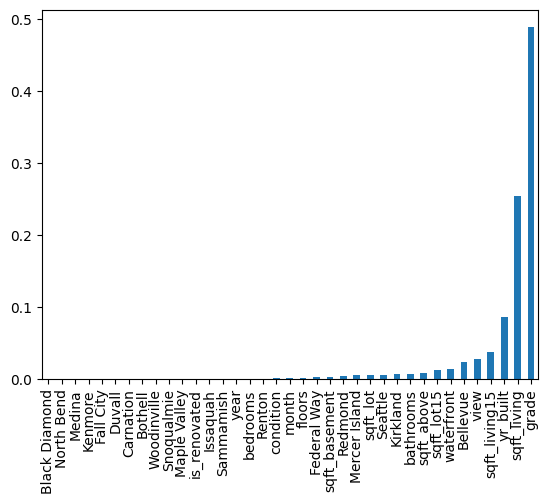

In [103]:
rf.feature_selection() # getting most important features, depending on random forest selestion

In [104]:
#rf.learn_curve(train_size=[1, 75, 150, 270, 331])

new trial of dataframe adding latitude and longitude (df_lat)

In [105]:
rf=Regresssion_models(data=df_lat,target="price",algorithim=RandomForestRegressor(random_state=0))
# adding latitude and longitude in our consideration 

In [106]:
rf.score()# calculating accuracies (cv, train, test) for first trial without tuning >> overfitting 

'validation_score:0.8683570181300586,train_score:0.9820605028339763 ,test_score :0.8988348862295171'

In [107]:
dict_=rf.enhance_rf_model(n_estimators=np.arange(100,250,50),max_depth=np.arange(3,10,1),min_sample_leaf=np.arange(5,20,1))#tuningtuning hyperparameter

In [108]:
rf=Regresssion_models(data=df_lat,target="price",algorithim=RandomForestRegressor(**dict_))#instantiate the class with new hyperparameter


In [109]:
rf.score() #elimenating overfitting and the accuracy is good 

'validation_score:0.8422172858830844,train_score:0.8987259339319296 ,test_score :0.8746957778271341'

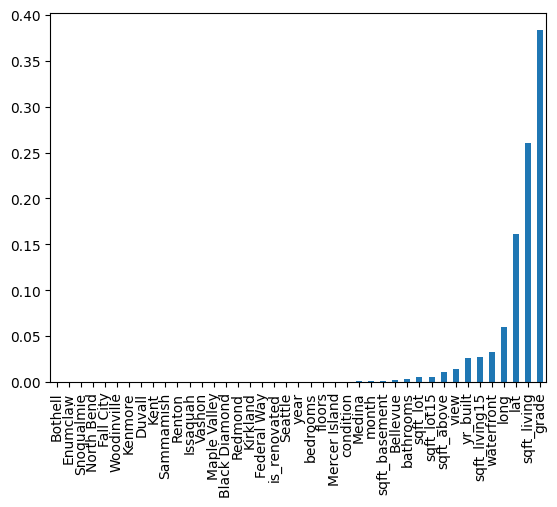

In [110]:
rf.feature_selection() # the most important feature selection >> the lat and long take place 

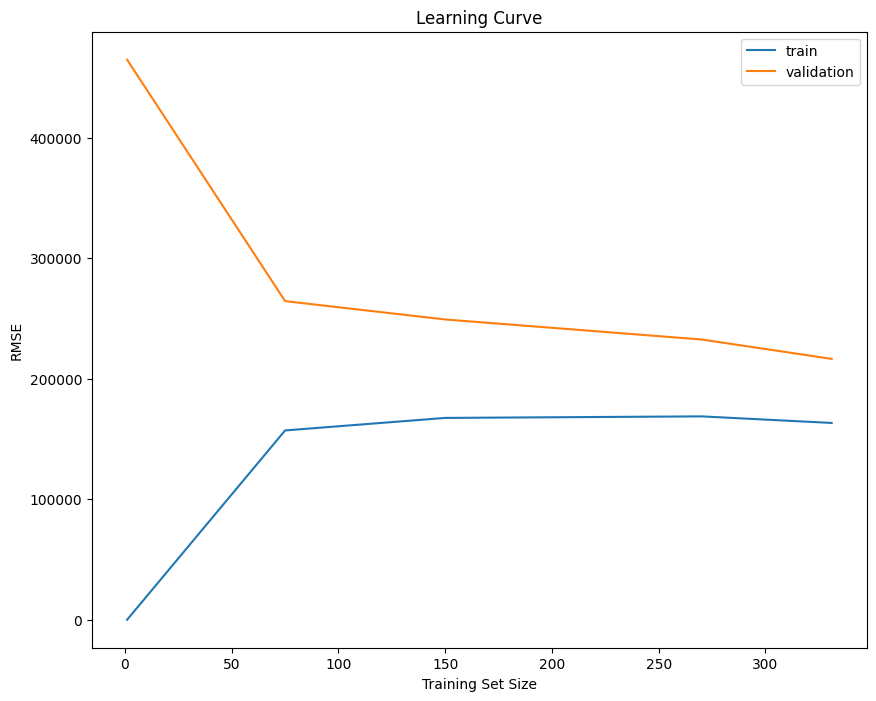

In [111]:
rf.learn_curve(train_size=[1, 75, 150, 270, 331]) # validation of the data using learning curve

# GradiantBoosting 

dataframe without latitude and longitude

In [112]:
GB=Regresssion_models(df_new,"price",GradientBoostingRegressor())
GB.score() #calculating score (cv, train, test) for first trial without tuning >> overfitting 

'validation_score:0.7972181151530807,train_score:0.8440226182351426 ,test_score :0.8308528576388579'

new trial of dataframe adding latitude and longitude (df_lat)



In [113]:
GB=Regresssion_models(df_lat,"price",GradientBoostingRegressor())
GB.score()#calculating accuracies (cv, train, test) for first trial without tuning >> overfitting (higher than (df_new))

'validation_score:0.8591572869511079,train_score:0.9020358081119414 ,test_score :0.8890473421191253'

In [114]:
GB=Regresssion_models(df_lat,"price",GradientBoostingRegressor(learning_rate=0.2)) #instantiate the class based on learning rate =0.2

In [115]:
GB.enhance_boost_model(n_estimators=np.arange(50,200,10)) #hyperparameter tuning to find appropriate number of trees, at specific learning rate

0.858 for {'n_estimators': 50}
0.862 for {'n_estimators': 60}
0.866 for {'n_estimators': 70}
0.867 for {'n_estimators': 80}
0.870 for {'n_estimators': 90}
0.872 for {'n_estimators': 100}
0.873 for {'n_estimators': 110}
0.875 for {'n_estimators': 120}
0.876 for {'n_estimators': 130}
0.877 for {'n_estimators': 140}
0.876 for {'n_estimators': 150}
0.877 for {'n_estimators': 160}
0.877 for {'n_estimators': 170}
0.878 for {'n_estimators': 180}
0.880 for {'n_estimators': 190}


In [116]:
GB=Regresssion_models(df_lat,"price",GradientBoostingRegressor(learning_rate=0.2,n_estimators=190)) #instantiate the new class with the best number of trees
GB.score() #calculating score (cv, train, test) for second trial without hyperparameters related to the tree

'validation_score:0.8738900815493901,train_score:0.935542586055407 ,test_score :0.9049758178867202'

In [117]:
GB.enhance_boost_model_second(max_depth=np.arange(5,15,1) ,min_sample_leaf=np.arange(10,50,5)) #hyperparameter tuning

0.874  for {'min_samples_leaf': 20, 'max_depth': 12}
0.872  for {'min_samples_leaf': 30, 'max_depth': 14}
0.888  for {'min_samples_leaf': 10, 'max_depth': 5}
0.870  for {'min_samples_leaf': 35, 'max_depth': 13}
0.872  for {'min_samples_leaf': 25, 'max_depth': 14}
0.874  for {'min_samples_leaf': 20, 'max_depth': 10}
0.879  for {'min_samples_leaf': 30, 'max_depth': 7}
0.872  for {'min_samples_leaf': 40, 'max_depth': 13}
0.869  for {'min_samples_leaf': 45, 'max_depth': 14}
0.873  for {'min_samples_leaf': 40, 'max_depth': 9}
0.879  for {'min_samples_leaf': 35, 'max_depth': 5}
0.873  for {'min_samples_leaf': 25, 'max_depth': 9}
0.866  for {'min_samples_leaf': 10, 'max_depth': 11}
0.870  for {'min_samples_leaf': 20, 'max_depth': 14}
0.881  for {'min_samples_leaf': 15, 'max_depth': 7}
0.876  for {'min_samples_leaf': 20, 'max_depth': 8}
0.873  for {'min_samples_leaf': 20, 'max_depth': 11}
0.870  for {'min_samples_leaf': 25, 'max_depth': 10}
0.869  for {'min_samples_leaf': 10, 'max_depth': 9}
0

In [118]:
GB=Regresssion_models(df_lat,"price",GradientBoostingRegressor(learning_rate=0.2,n_estimators=190,max_depth= 3,min_samples_leaf= 30)) #instantiate the class
GB.score() #calculating score (cv, train, test) for third trial  >> the best model


'validation_score:0.8787296407243879,train_score:0.9225414026860724 ,test_score :0.9004212617550982'

In [119]:
GB.rmse()

'root mean square error : 118318.03811132658'

#Feature Selection 

In [120]:
from seaborn.regression import algo
class feature_selection () :  #selecting the most important features using random forest and lasso
  def __init__ (self ,data, target): 
    """ variables related to the entire class """
    self.data =data 
    self.target =target 
  
  def Random_forest_method (self) : 
    """ most important features, depending on random forest selestion"""
    X=self.data.drop(self.target ,axis=1)
    y=self.data[self.target]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25 ,random_state=0) 
    rf=RandomForestRegressor(n_estimators=100)
    rf.fit(X_train ,y_train)
    importance_feature= pd.Series ( rf.feature_importances_, index=X.columns).sort_values() 
    s=pd.Series(np.array(X.columns)[rf.feature_importances_ > 0.05])
    df_rf=pd.DataFrame(self.data.loc[:,s])
    plot=importance_feature.plot(kind="bar") 
    return df_rf,plot
  
  def Lasso(self ,k_fold=5) : 
    """ most important features, depending on lasso coefficients (ignoring the coefficient which shrinks to zero)"""
    X=self.data.drop(self.target ,axis=1)
    y=self.data[self.target]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25 ,random_state=0) 
    pipeline = Pipeline([('scaler',StandardScaler()),
                     ('model',Lasso())])    
    search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,3,0.3)},
                      cv = k_fold, scoring="neg_mean_squared_error")
    search.fit(X_train,y_train)
    coefficients = search.best_estimator_.named_steps['model'].coef_
    importance = np.abs(coefficients)  
    importance_feature= pd.Series ( importance, index=X.columns).sort_values()
    s=pd.Series(np.array(X.columns)[importance > 0]) 
    df_lasso=pd.DataFrame(self.data.loc[:,s])
    plot=importance_feature.plot(kind="bar")
    return df_lasso ,plot


In [121]:
mdl=feature_selection(df_lat,"price") #instantiate class

       sqft_living grade      lat     long
0             1180     7  47.5112 -122.257
1             2570     7  47.7210 -122.319
2              770     6  47.7379 -122.233
3             1960     7  47.5208 -122.393
4             1680     8  47.6168 -122.045
...            ...   ...      ...      ...
21608         1530     8  47.6993 -122.346
21609         2310     8  47.5107 -122.362
21610         1020     7  47.5944 -122.299
21611         1600     8  47.5345 -122.069
21612         1020     7  47.5941 -122.299

[21596 rows x 4 columns]


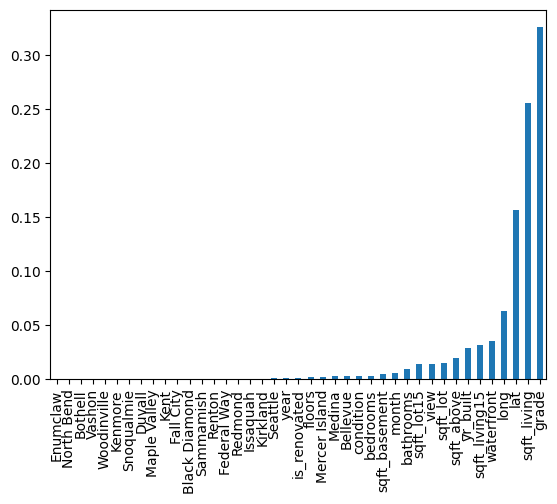

In [122]:
df_rf,plot_rf=mdl.Random_forest_method() #selecting features depending on random forest, and printing the dataframe and plot
print(df_rf)

       sqft_living grade      lat     long
0             1180     7  47.5112 -122.257
1             2570     7  47.7210 -122.319
2              770     6  47.7379 -122.233
3             1960     7  47.5208 -122.393
4             1680     8  47.6168 -122.045
...            ...   ...      ...      ...
21608         1530     8  47.6993 -122.346
21609         2310     8  47.5107 -122.362
21610         1020     7  47.5944 -122.299
21611         1600     8  47.5345 -122.069
21612         1020     7  47.5941 -122.299

[21596 rows x 4 columns]


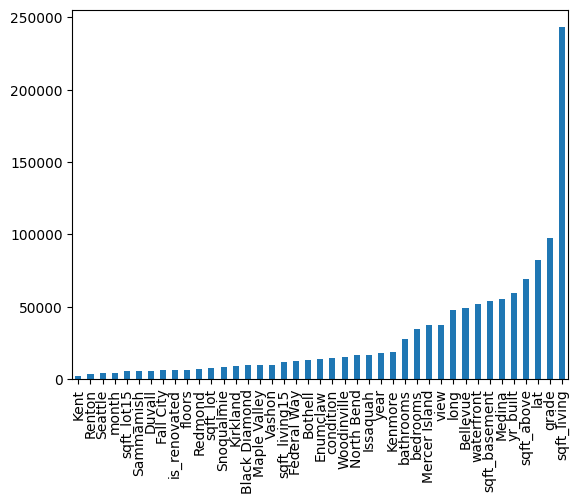

In [123]:
df_lasso,plot_lasso=mdl.Lasso() #selecting features depending on lasso, and printing the dataframe and plot
print(df_rf)

#Saving the best trained model 

In [124]:
#Training the best model
GB=GradientBoostingRegressor(learning_rate=0.2,n_estimators=190,max_depth= 3,min_samples_leaf= 30)
X=df_lat.drop("price",axis=1)
y=df_lat["price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25 ,random_state=0) 
GB.fit(X_train,y_train) 

GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=30,
                          n_estimators=190)

In [125]:
import pickle 
filename ="trained_model2.sav"#naming the file we want to save it in
pickle.dump(GB,open(filename,"wb"))#saving the best model (GB)


In [126]:
# loading the model 
load_model=pickle.load(open("trained_model2.sav","rb"))

# The End
